# Schelling Segregation Model

## Background

The Schelling (1971) segregation model is a classic of agent-based modeling, demonstrating how agents following simple rules lead to the emergence of qualitatively different macro-level outcomes. Agents are randomly placed on a grid. There are two types of agents, one constituting the majority and the other the minority. All agents want a certain number (generally, 3) of their 8 surrounding neighbors to be of the same type in order for them to be happy. Unhappy agents will move to a random available grid space. While individual agents do not have a preference for a segregated outcome (e.g. they would be happy with 3 similar neighbors and 5 different ones), the aggregate outcome is nevertheless heavily segregated.

In [1]:
from mesa.batchrunner import batch_run
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
from matplotlib.colors import LinearSegmentedColormap

sys.path.insert(0,'./schelling/')

from model import Schelling
%matplotlib inline
unikcolors = [np.array((80,149,200))/255, np.array((74,172,150))/255,
                                                  np.array((234,195,114))/255, np.array((199,16,92))/255]
uniks = LinearSegmentedColormap.from_list( 'unik', unikcolors)

Now we instantiate a model instance: a 20x20 grid, with an 80% chance of an agent being placed in each cell, approximately 20% of agents set as minorities, and agents wanting varying numbers ofsimilar neighbors.

  0%|          | 0/48 [00:00<?, ?it/s]

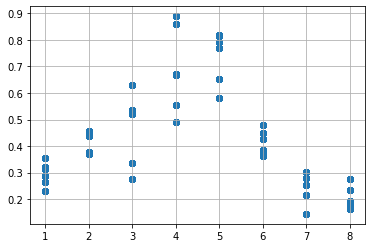

In [2]:
params = {"height": 20, "width": 20, "density": 0.8, "minority_pc": 0.2, "homophily": range(1, 9),
         "seed_init": range(0,6),
         "seed_activate": 0,
         "seed_move": 0}

results = batch_run(
        Schelling,
        parameters=params,
        iterations = 1,
    )

df_init = pd.DataFrame(results)
plt.scatter(df_init['homophily'], df_init['Segregated_Agents'])
plt.grid(True)

  0%|          | 0/48 [00:00<?, ?it/s]

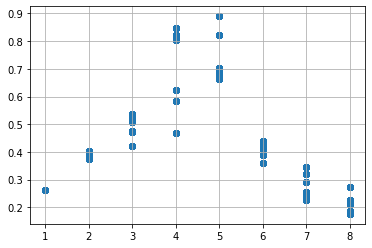

In [4]:
params = {"height": 20, "width": 20, "density": 0.8, "minority_pc": 0.2, "homophily": range(1, 9),
         "seed_init": 0,
         "seed_activate": range(0,6),
         "seed_move": 0}

from mesa.batchrunner import batch_run

param_sweep = batch_run(
    Schelling,
    parameters=params,
    max_steps=200,
)

df_activate = pd.DataFrame(param_sweep)
plt.scatter(df_activate['homophily'], df_activate['Segregated_Agents'])
plt.grid(True)

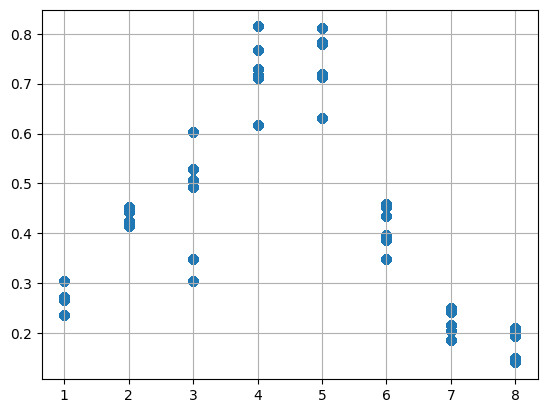

In [10]:
params = {"height": 20, "width": 20, "density": 0.8, "minority_pc": 0.2, "homophily": range(1, 9),
         "seed_init": 0,
         "seed_activate": 0,
         "seed_move": range(0,6)}

from mesa.batchrunner import batch_run

with io.capture_output() as captured:
    param_sweep = batch_run(
        Schelling,
        parameters=params,
        max_steps=200,
    )

df_move = pd.DataFrame(param_sweep)
plt.scatter(df_move['homophily'], df_move['Segregated_Agents'])
plt.grid(True)

<Figure size 640x480 with 0 Axes>

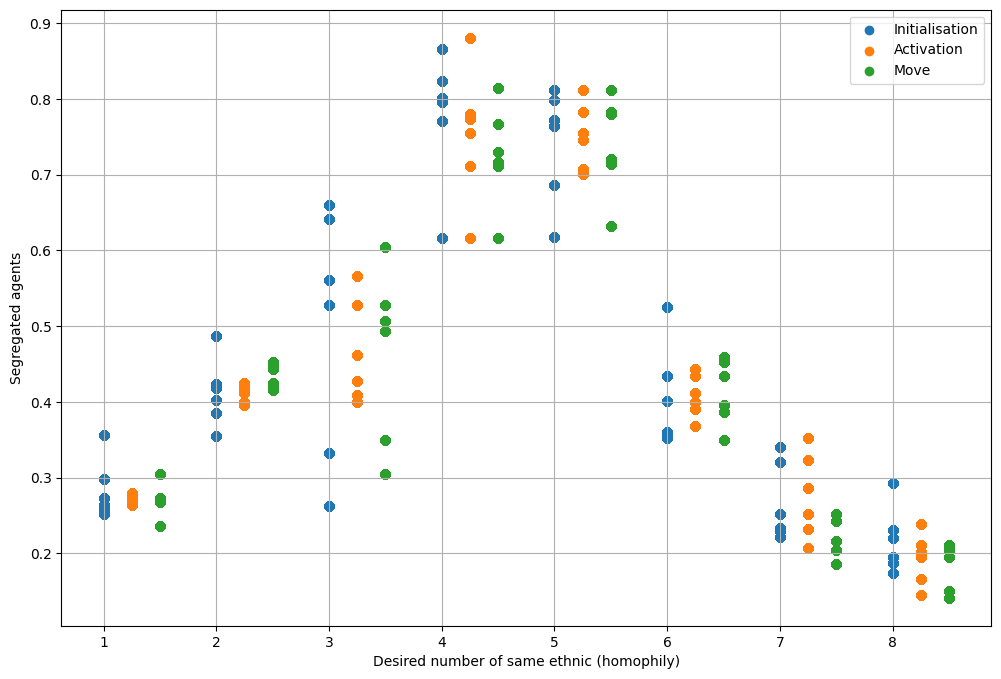

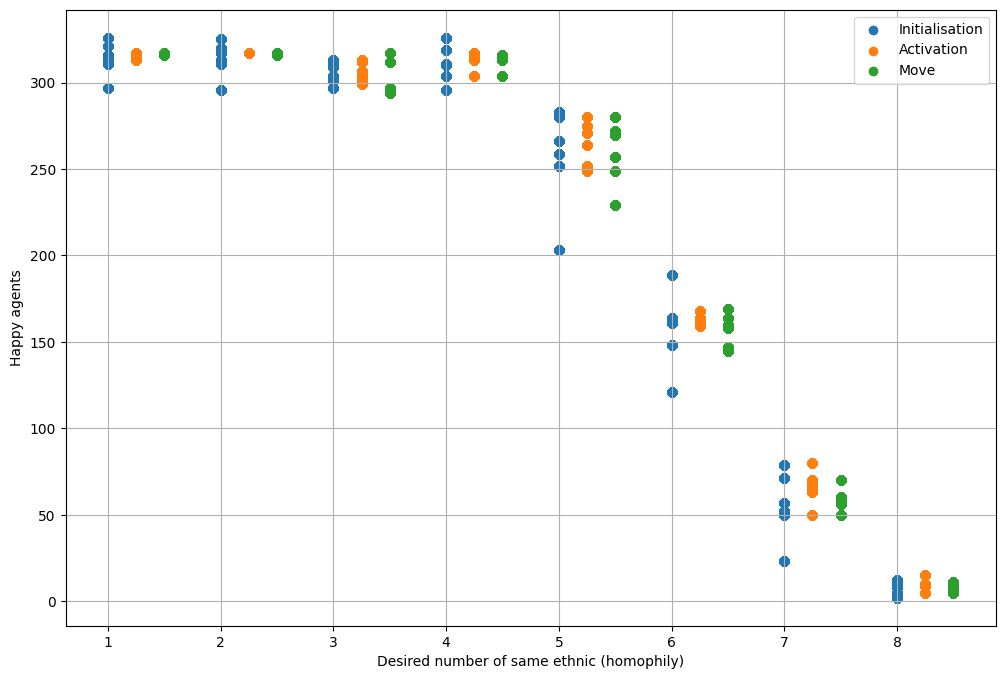

In [11]:
df_init2 = df_init.copy()
df_activate2 = df_activate.copy()
df_move2 = df_move.copy()

plt.figure(0)
fig, ax = plt.subplots()
ax.set_xlabel("Desired number of same ethnic (homophily)")
ax.set_ylabel("Segregated agents (all neighbours of own ethnic)")

plt.scatter(df_init2['homophily'], df_init2['Segregated_Agents'], label="Initialisation")
df_activate2['homophily'] = df_activate2['homophily'] + 0.25
plt.scatter(df_activate2['homophily'], df_activate2['Segregated_Agents'], label="Activation")
df_move2['homophily'] = df_move2['homophily'] + 0.5
plt.scatter(df_move2['homophily'], df_move2['Segregated_Agents'], label="Move")

ax.legend(loc="upper right")
fig.set_size_inches(12,8)
plt.grid(True)
fig.savefig("schelling_segregatedAgents.png")

plt.figure(1)
fig, ax = plt.subplots()
ax.set_xlabel("Desired number of same ethnic (homophily)")
ax.set_ylabel("Happy agents")

plt.scatter(df_init2['homophily'], df_init2['happy'], label="Initialisation")
plt.scatter(df_activate2['homophily'], df_activate2['happy'], label="Activation")
plt.scatter(df_move2['homophily'], df_move2['happy'], label="Move")

ax.legend(loc="upper right")
fig.set_size_inches(12,8)
plt.grid(True)

In [6]:
df_init

,RunId,iteration,Step,height,width,density,minority_pc,homophily,seed_init,seed_activate,seed_move,happy,Segregated_Agents,AgentID,x,y
0,0,0,2,20,20,0.8,0.2,1,0,0,0,313,0.264151,7,0,7
1,0,0,2,20,20,0.8,0.2,1,0,0,0,313,0.264151,107,7,1
2,0,0,2,20,20,0.8,0.2,1,0,0,0,313,0.264151,265,16,18
3,0,0,2,20,20,0.8,0.2,1,0,0,0,313,0.264151,181,11,19
4,0,0,2,20,20,0.8,0.2,1,0,0,0,313,0.264151,238,15,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15123,47,0,1000,20,20,0.8,0.2,8,5,0,0,5,0.192661,312,15,17
15124,47,0,1000,20,20,0.8,0.2,8,5,0,0,5,0.192661,307,10,17
15125,47,0,1000,20,20,0.8,0.2,8,5,0,0,5,0.192661,45,9,17
15126,47,0,1000,20,20,0.8,0.2,8,5,0,0,5,0.192661,67,3,8
